<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/machine-learning/blob/master/Regress%C3%A3o_Linear_%5Bboston%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Nesse notebook estarei abordando uma aplicação direta de regressão linear com sckit-learn

Iremos prever valor mediano das casas ocupadas pelos proprietários em milhares de dólares (MEDV), logo ele será nosso target/alvo.

In [85]:
# Carregando bibliotecas que utilizaremos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Carregando dataset a ser utilizado "Boston"
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df = raw_df.dropna()
data = raw_df.drop(columns=[10])
target = raw_df[10]
# Nesse exemplo simplesmente excluimos valores nulos presentes nos dados desconsiderando a parte da tratativa dos dados [Jamais faça isso em um caso real]

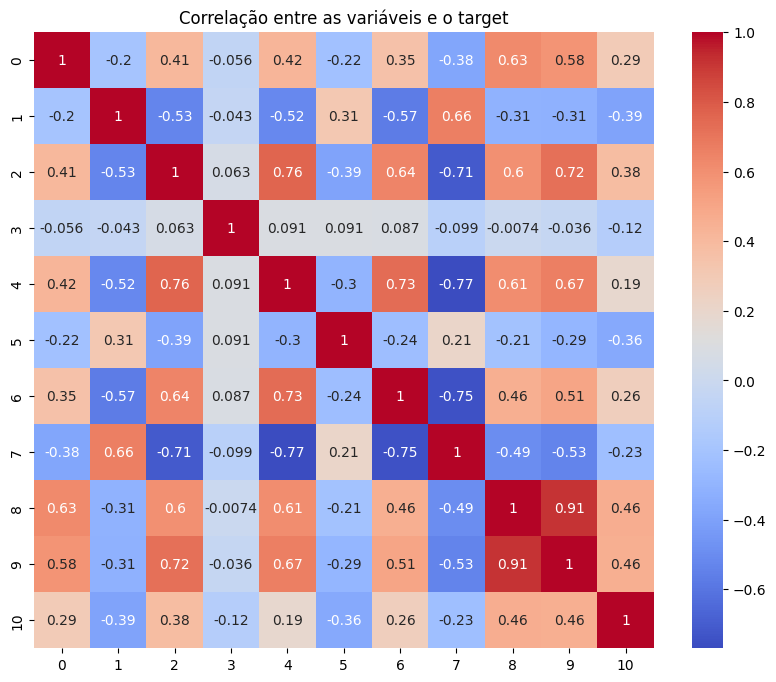

In [87]:
# Para avaliar possível correlação entre as variáveis, normalmente utiliza-se um mapa de correlação abaixo:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = raw_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlação entre as variáveis e o target')
plt.show()
# Não estamos dando atenção aos dados, mas se quiser comparar as colunas estão presentes no site: http://lib.stat.cmu.edu/datasets/boston

In [93]:
# Dividindo os dados em conjunto de treinamento[train] e teste[test]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.05, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Imprimindo Coeficiente
print('Coeficiente do modelo')
[print(f'{id}º Coeficiente: {round(x,3)}') for id,x in enumerate(model.coef_, start=1)]
# Imprimindo o Intercepto
print(f"\nIntercepto do modelo\nValor: {round(model.intercept_,2)}")

Coeficiente do modelo
1º Coeficiente: -0.004
2º Coeficiente: -0.033
3º Coeficiente: 0.059
4º Coeficiente: -0.588
5º Coeficiente: -9.864
6º Coeficiente: -0.606
7º Coeficiente: 0.011
8º Coeficiente: 0.17
9º Coeficiente: 0.101
10º Coeficiente: 0.002

Intercepto do modelo
Valor: 24.24


In [94]:
print('Formula para previsão: y = b0 + b1*x1 + b2*x2 + ... + bn*xn')
print('Onde: b0 é o Intercepto e os demais "b"s são os coeficientes que encontramos\nOBS: Já que temos 10 colunas podemos dizer que teremos 10 "b"s')
print('\nAqui aplicaremos manualmente o calculo da previsão:\n')
for id,(valor,coef) in enumerate(zip(X_test.iloc[0], model.coef_), start=1):
  print(f'b{id} = {round(valor,2)} x {round(coef,2)} = {round(valor*coef,2)}')
print(f'Aplicando b0 + a soma dos resultados acima: {round(model.intercept_ + sum([valor*coef for valor,coef in zip(X_test.iloc[0], model.coef_)]),2)}')


Formula para previsão: y = b0 + b1*x1 + b2*x2 + ... + bn*xn
Onde: b0 é o Intercepto e os demais "b"s são os coeficientes que encontramos
OBS: Já que temos 10 colunas podemos dizer que teremos 10 "b"s

Aqui aplicaremos manualmente o calculo da previsão:

b1 = 0.09 x -0.0 = -0.0
b2 = 0.0 x -0.03 = -0.0
b3 = 4.05 x 0.06 = 0.24
b4 = 0.0 x -0.59 = -0.0
b5 = 0.51 x -9.86 = -5.03
b6 = 6.42 x -0.61 = -3.89
b7 = 84.1 x 0.01 = 0.96
b8 = 2.65 x 0.17 = 0.45
b9 = 5.0 x 0.1 = 0.5
b10 = 296.0 x 0.0 = 0.63
Aplicando b0 + a soma dos resultados acima: 18.11


In [95]:
print('Agora se utilizamos o memso modelo para prever os mesmo valores, teremos o mesmo resultado:')
print(f'Valor previsto: {round(model.predict(np.array(X_test.iloc[0]).reshape(1,-1))[0],2)}')

Agora se utilizamos o memso modelo para prever os mesmo valores, teremos o mesmo resultado:
Valor previsto: 18.11


In [96]:
print('Demais previsões do mesmo modelo com seus respectivos deltas\n')
for id, (real, previsto) in enumerate(zip(y_test, y_pred), start=1):
    print(f'{id}º Previsão com DIF {round(real - previsto, 1)}\n--> Real {real}\n--> Previsto {round(previsto, 1)}\n')


Demais previsões do mesmo modelo com seus respectivos deltas

1º Previsão com DIF -1.5
--> Real 16.6
--> Previsto 18.1

2º Previsão com DIF 1.4
--> Real 17.6
--> Previsto 16.2

3º Previsão com DIF 0.5
--> Real 20.1
--> Previsto 19.6

4º Previsão com DIF 0.0
--> Real 19.2
--> Previsto 19.2

5º Previsão com DIF 0.5
--> Real 20.2
--> Previsto 19.7

6º Previsão com DIF -1.1
--> Real 18.7
--> Previsto 19.8

7º Previsão com DIF -0.2
--> Real 18.4
--> Previsto 18.6

8º Previsão com DIF 2.9
--> Real 21.2
--> Previsto 18.3

9º Previsão com DIF -1.5
--> Real 20.2
--> Previsto 21.7

10º Previsão com DIF 1.0
--> Real 19.2
--> Previsto 18.2

11º Previsão com DIF -1.7
--> Real 16.4
--> Previsto 18.1

12º Previsão com DIF -3.6
--> Real 15.2
--> Previsto 18.8

13º Previsão com DIF -0.6
--> Real 20.2
--> Previsto 20.8

14º Previsão com DIF -1.0
--> Real 18.7
--> Previsto 19.7

15º Previsão com DIF 0.5
--> Real 19.6
--> Previsto 19.1

16º Previsão com DIF 0.1
--> Real 20.2
--> Previsto 20.1

17º Previsã